In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/anz/anaconda3/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def gen(num_train=1000,num_feature=5):
    gen_graph =  tf.Graph()
    with gen_graph.as_default():
        w = tf.random_normal([num_feature,1])
        b = tf.Variable(np.random.rand())
        x = tf.random_normal(shape=[num_train,num_feature])
        y = tf.matmul(x,w)+b
    with tf.Session(graph=gen_graph) as sess:
        sess.run(tf.global_variables_initializer())
        x,y,w,b =sess.run([x,y,w,b])
        return x,y,w,b

In [3]:
# X : matrix mxn
# w : matrix nx1
# y : matrix mx1
# b : scalar
def linreg(x,y,iterations=1000,lr=0.01):
    num_train = x.shape[0]
    num_feature = x.shape[1]
    losses = []
    w = tf.Variable(tf.zeros([num_feature,1]))
    b = tf.Variable(np.random.rand())
    x_t = tf.placeholder(tf.float32,shape=[None,num_feature])
    y_t = tf.matmul(x_t,w)+b
    loss = 0.5 * tf.reduce_mean(tf.square(y_t-y),0)
    update_w = w.assign(tf.subtract(w,tf.matmul(tf.transpose(x),(y_t-y))*(1.0/num_train)*lr))
    update_b = b.assign(tf.subtract(b,tf.reduce_mean(y_t-y)*lr))
    with tf.Session(graph=tf.get_default_graph()) as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(iterations):
            _loss,_w,_b,_x,_u,_b=sess.run([loss,w,b,x_t,update_w,update_b],feed_dict={x_t : x})
            losses.append(_loss)
            print(_loss)
    print(_w,_b)
    plt.plot(losses)
    plt.show()
    
        
        

[1.8246055]
[1.7886746]
[1.7534578]
[1.7189404]
[1.6851089]
[1.6519498]
[1.619449]
[1.5875936]
[1.5563706]
[1.5257678]
[1.495772]
[1.4663709]
[1.437554]
[1.409308]
[1.3816223]
[1.3544858]
[1.327887]
[1.3018156]
[1.2762601]
[1.2512119]
[1.2266595]
[1.2025938]
[1.1790044]
[1.1558819]
[1.1332172]
[1.1110008]
[1.0892239]
[1.0678784]
[1.0469546]
[1.0264447]
[1.0063404]
[0.9866336]
[0.9673164]
[0.9483809]
[0.9298193]
[0.9116245]
[0.89378893]
[0.87630576]
[0.8591677]
[0.84236777]
[0.82589954]
[0.8097562]
[0.79393154]
[0.778419]
[0.763212]
[0.7483052]
[0.7336921]
[0.7193672]
[0.70532453]
[0.6915587]
[0.6780638]
[0.6648348]
[0.6518661]
[0.639153]
[0.62669]
[0.61447227]
[0.602495]
[0.5907534]
[0.57924265]
[0.5679584]
[0.55689585]
[0.5460509]
[0.53541905]
[0.5249962]
[0.5147782]
[0.50476074]
[0.49494025]
[0.4853124]
[0.4758737]
[0.46662027]
[0.45754835]
[0.44865456]
[0.43993515]
[0.43138683]
[0.42300624]
[0.4147898]
[0.40673444]
[0.3988372]
[0.3910946]
[0.38350368]
[0.3760614]
[0.36876503]
[0.361

[7.4650455e-07]
[7.3319444e-07]
[7.200774e-07]
[7.0724894e-07]
[6.9469667e-07]
[6.8231236e-07]
[6.7017623e-07]
[6.5823326e-07]
[6.4649595e-07]
[6.349975e-07]
[6.236781e-07]
[6.126184e-07]
[6.016707e-07]
[5.910149e-07]
[5.804422e-07]
[5.7009237e-07]
[5.598929e-07]
[5.4993745e-07]
[5.40166e-07]
[5.305145e-07]
[5.211163e-07]
[5.118375e-07]
[5.027539e-07]
[4.938127e-07]
[4.850497e-07]
[4.763941e-07]
[4.67938e-07]
[4.596069e-07]
[4.51446e-07]
[4.4341337e-07]
[4.355245e-07]
[4.2776705e-07]
[4.202081e-07]
[4.1271187e-07]
[4.0535048e-07]
[3.9815617e-07]
[3.9105086e-07]
[3.840874e-07]
[3.7725388e-07]
[3.7056068e-07]
[3.6396557e-07]
[3.575172e-07]
[3.511443e-07]
[3.4488383e-07]
[3.387499e-07]
[3.3268947e-07]
[3.2679685e-07]
[3.2097694e-07]
[3.1530803e-07]
[3.0972151e-07]
[3.041783e-07]
[2.9881483e-07]
[2.9348834e-07]
[2.88248e-07]
[2.8312107e-07]
[2.78063e-07]
[2.731441e-07]
[2.683086e-07]
[2.6351046e-07]
[2.588427e-07]
[2.5423057e-07]
[2.4969015e-07]
[2.452692e-07]
[2.4091057e-07]
[2.3664235e-0

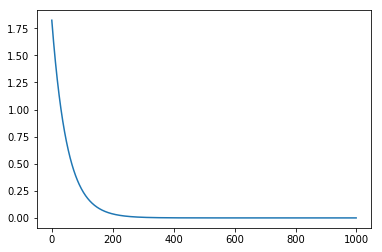

[[-0.31048012]
 [-0.13367026]
 [ 0.40983123]
 [ 1.2616183 ]
 [-1.1907779 ]] 0.895945


In [4]:
x,y,w,b=gen()
linreg(x,y)
print(w,b)